In [99]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/shubhammishra/Downloads/matches.csv') #importing the csv file
data.isna().sum()
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
data.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [136]:
data = pd.read_csv('/Users/shubhammishra/Downloads/matches.csv',
                  index_col=3,
                  parse_dates=True)

In [18]:
data.shape

(1095, 20)

In [20]:
data.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [105]:
data['method']=data['method'].fillna("Normal")
data['city']=data['city'].fillna('Unknown')


data['team1']=data['team1'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
data['team2']=data['team2'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
data['winner']=data['winner'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
data['toss_winner']=data['toss_winner'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')


data['team1']=data['team1'].replace('Kings XI Punjab','Punjab Kings')
data['team2']=data['team2'].replace('Kings XI Punjab','Punjab Kings')
data['winner']=data['winner'].replace('Kings XI Punjab','Punjab Kings')
data['toss_winner']=data['toss_winner'].replace('Kings XI Punjab','Punjab Kings')


data['team1']=data['team1'].replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].replace('Delhi Daredevils','Delhi Capitals')
data['toss_winner']=data['toss_winner'].replace('Delhi Daredevils','Delhi Capitals')


data['team1']=data['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].replace('Deccan Chargers','Sunrisers Hyderabad')
data['toss_winner']=data['toss_winner'].replace('Deccan Chargers','Sunrisers Hyderabad')

data['team1']=data['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['team2']=data['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['winner']=data['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['toss_winner']=data['toss_winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [41]:
data.isna().sum()

id                  0
season              0
city                0
match_type          0
player_of_match     5
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              5
result              0
result_margin      19
target_runs         3
target_overs        3
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

In [177]:
citc=data['city'].value_counts()
venc=data['venue'].value_counts()
matc=(data['team1'].value_counts()+data['team2'].value_counts()).sort_values(ascending=False)
win=data['winner'].value_counts()
tosc=data['toss_winner'].value_counts()


mask1 = data['toss_winner'] == data['winner']

tmwin = data[mask1].shape[0]

mask1 = data['toss_winner'] != data['winner']

tmlos = data[mask1].shape[0]-5

wilo=[tmwin,tmlos]
wilo1=['win','loss']

years=[str(i) for i in range(2008,2025)]
matches=[]
for i in years:
    matches.append(data.loc[i].shape[0])



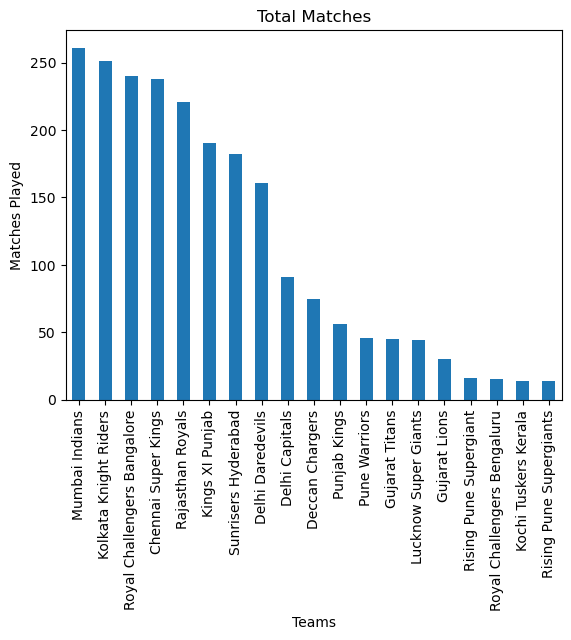

In [190]:
matcg=matc.plot(kind='bar',title='Total Matches',ylabel='Matches Played',xlabel='Teams')

This Graph shows us the number of matches that have been played by each of the ipl Teams

Text(0.5, 1.0, 'Matches Per Year')

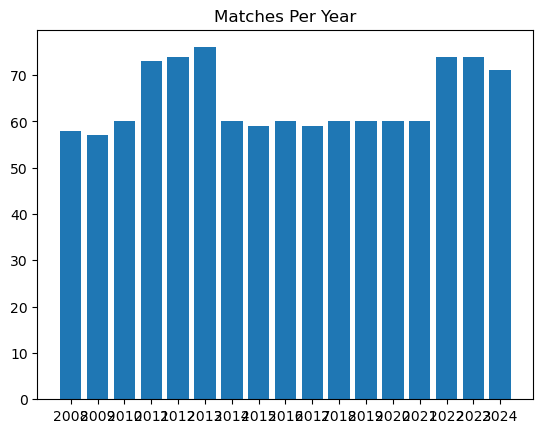

In [189]:
plt.bar(years,matches)
ylael='Matches'
xlabel='Year'
plt.title('Matches Per Year')

This Graph shows us the total number of matches played in all the 17 seasons

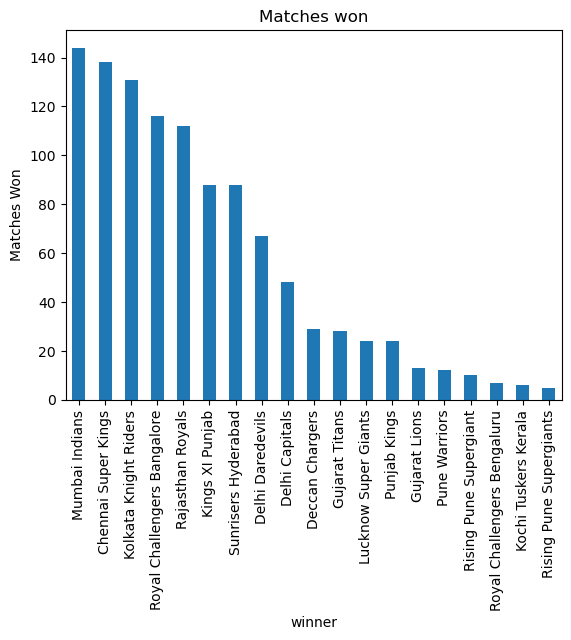

In [191]:
wing=win.plot(kind='bar',title='Matches won',ylabel='Matches Won')

This Graph shows us the total number of matches won by all the teams

<Axes: xlabel='city'>

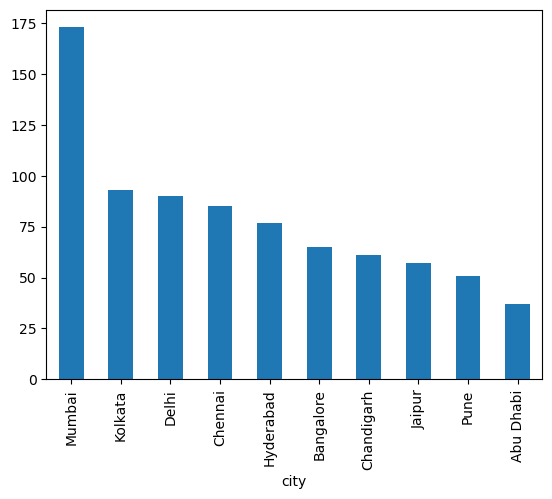

In [192]:
citc[0:10].plot(kind='bar')

This Graph shows the number of matches played across different cities

Text(0.5, 1.0, 'Toss winner vs match winner')

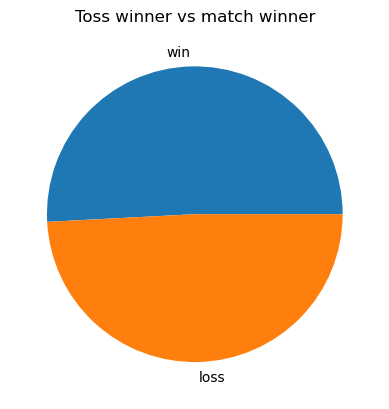

In [193]:
plt.pie(wilo,labels=wilo1)
plt.title("Toss winner vs match winner")

This chart shows the ratio of the number of matches resulted in win or loss by the teams who have won the toss

# 🏏 IPL Match Data Analysis (2008–2024)

## 📌 Project Overview

In this project, I performed an Exploratory Data Analysis (EDA) on IPL match data from 2008 to 2024, containing 1095 matches and 20 features.
The goal was to clean the data, analyze historical trends, and visualize key insights related to teams, venues, seasons, and match outcomes.

This project demonstrates practical use of:
	•	Data cleaning
	•	Feature transformation
	•	Grouping and aggregation
	•	Data visualization
	•	Insight extraction

⸻

## 🛠 Tools & Libraries Used
	•	Python
	•	Pandas – Data manipulation and cleaning
	•	NumPy – Numerical operations
	•	Matplotlib – Data visualization

⸻

## 🧹 Data Cleaning & Preprocessing

The following preprocessing steps were applied:
	•	Converted date column from object to datetime
	•	Replaced missing values in:
	•	method → "Normal"
	•	city → "Unknown"
	•	Updated old team names to current franchise names in:
	•	team1, team2, toss_winner, winner
	•	Verified that the dataset contains no duplicate rows

⸻

## 📊 Key Insights

1️⃣ Most Matches Played
	•	Mumbai Indians have played the highest number of matches (261) in IPL history.

⸻

2️⃣ Most Matches Won
	•	Mumbai Indians lead with 144 wins.
	•	Other top-performing teams:
	•	CSK – 138 wins
	•	KKR – 131 wins

⸻

3️⃣ Venue Distribution
	•	Wankhede Stadium (Mumbai) hosted the most IPL matches.
	•	Only 2 matches were played at:
	•	OUTsurance Oval
	•	Dr. Y.S. Rajasekhara Reddy ACA-VDCA Stadium (Visakhapatnam)

⸻

4️⃣ City Hosting Trends
	•	Mumbai is the most frequent IPL host city.

⸻

5️⃣ Toss Impact
	•	Out of 1095 matches:
	•	Toss winners won 554 matches
	•	Toss winners lost 536 matches
	•	This indicates only a slight advantage from winning the toss.

⸻

6️⃣ Season Growth
	•	The number of matches per year shows:
	•	IPL’s expansion over time
	•	Scheduling variations across seasons

⸻

## 📈 Visualizations
	•	Matches played per team
	•	Matches won per team
	•	Matches per season
	•	City-wise match distribution
	•	Toss winner vs match winner (pie chart)
	•	Team comparison charts

Each visualization was used to support and validate insights extracted from the dataset.

⸻

⚠ Limitations
	•	The dataset contains only match-level data (no ball-by-ball details).
	•	Player-level performance analysis is not possible.
	•	External factors like:
	•	Weather
	•	Pitch conditions
	•	Team injuries
	•	Squad changes
are not included.
	•	The dataset does not include recent format changes or impact player rules.

⸻

## 🚀 Future Scope

This project can be extended by:
	•	Adding ball-by-ball data for deeper insights
	•	Including player statistics for individual performance analysis
	•	Building ML models to:
	•	Predict match winners
	•	Estimate team win probability
	•	Creating an interactive dashboard using:
	•	Streamlit
	•	Power BI
	•	Applying regression models after Trimester-2 learning

⸻

## ✅ Conclusion

This IPL data analysis project demonstrates real-world data handling, cleaning, visualization, and storytelling skills.
It reflects the ability to extract actionable insights from structured datasets and build a complete data analysis workflow using Python.